interation: 0, best_solution: [-4.81961123 -4.41557831], best_fitness: 6.566473762658747e-14
interation: 1, best_solution: [-3.9875906 -4.8601406], best_fitness: 2.9403820782256878e-12
interation: 2, best_solution: [-5. -5.], best_fitness: 1.620038074623657e-16
interation: 3, best_solution: [-4.9545548  -4.76952763], best_fitness: 1.4846517407393235e-15
interation: 4, best_solution: [-4.73330893 -5.        ], best_fitness: 1.978678477287835e-15
interation: 5, best_solution: [-4.78532007 -5.        ], best_fitness: 1.2286800828354456e-15
interation: 6, best_solution: [-5. -5.], best_fitness: 1.620038074623657e-16
interation: 7, best_solution: [-4.73687502 -5.        ], best_fitness: 1.9154227188418194e-15
interation: 8, best_solution: [-4.91188937 -5.        ], best_fitness: 3.7642952005233345e-16
interation: 9, best_solution: [-5.         -4.67042083], best_fitness: 1.992494943640945e-15
interation: 10, best_solution: [-5.         -4.68117043], best_fitness: 1.8424123564770185e-15
inte

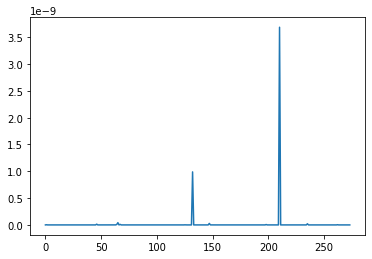

In [ ]:
import time
import random
import math
import numpy as np
import matplotlib.pyplot as plt
#------------------------------------------------------------------------------
# Customization section:
initial_temperature = 100
cooling = 0.999  # cooling coefficient
number_variables = 2
upper_bounds = [3, 3]   
lower_bounds = [-5, -5]  
computing_time = 1 # second(s)
 
def objective_function(X):
    x=X[0]
    y=X[1]
    value = 3*(1-x)**2*math.exp(-x**2 - (y+1)**2) - 10*(x/5 - x**3 - y**5)*math.exp(-x**2 - y**2) -1/3*math.exp(-(x+1)**2 - y**2)
    return value
 
#------------------------------------------------------------------------------
# Simulated Annealing Algorithm:
initial_solution=np.zeros((number_variables))
for v in range(number_variables):
    initial_solution[v] = random.uniform(lower_bounds[v],upper_bounds[v])
     
current_solution = initial_solution
best_solution = initial_solution
n = 1  # no of solutions accepted
best_fitness = objective_function(best_solution)
current_temperature = initial_temperature # current temperature
start = time.time()
no_attempts = 100 # number of attempts in each level of temperature
record_best_fitness =[]
 
for i in range(9999999):
    for j in range(no_attempts):
 
        for k in range(number_variables):
            current_solution[k] = best_solution[k] + 0.1*(random.uniform(lower_bounds[k],upper_bounds[k]))
            current_solution[k] = max(min(current_solution[k],upper_bounds[k]),lower_bounds[k])  # repair the solution respecting the bounds
  
        current_fitness = objective_function(current_solution)
        E = abs(current_fitness - best_fitness)
        if i == 0 and j == 0:
            EA = E
             
        if current_fitness < best_fitness:
            p = math.exp(-E/(EA*current_temperature))
            # make a decision to accept the worse solution or not
            if random.random()<p:
                accept = True # this worse solution is accepted
            else:
                accept = False # this worse solution is not accepted
        else:
            accept = True # accept better solution
        if accept==True:
            best_solution = current_solution # update the best solution
            best_fitness = objective_function(best_solution)
            n = n + 1 # count the solutions accepted
            EA = (EA *(n-1) + E)/n # update EA
     
    print('interation: {}, best_solution: {}, best_fitness: {}'.format(i, best_solution, best_fitness))
    record_best_fitness.append(best_fitness)
    # Cooling the temperature
    current_temperature = current_temperature*cooling
    # Stop by computing time
    end = time.time()
    if end-start >= computing_time:
        break
plt.plot(record_best_fitness)